In [1]:
import numpy as np
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()


# np.abs(0.0102-0.081)/0.0102
def percentage(y_proposed,y_compare):
    a = np.abs(y_proposed-y_compare)/y_compare
    a = a*100
    return a
# a1 =percentage(0.0081,0.0102)
# a2 = percentage(0.0128,0.0181)
# print(a1,a2)

#WT1
a1 = percentage(0.0052,0.0076)
a2= percentage(0.01334,0.01421)
print(f'{a1}%',f'{a2}%')
#WT32

a31 = percentage(0.0036,0.0063)
a32= percentage(0.01227,0.01445)
print(f'{a31}%',f'{a32}%')




Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

In [2]:
import heapq
import collections
### Huffaman Tree!!!
class HuffmanCoding:
    def __init__(self):
        self.heap = []
        self.codes = {}
        self.reverse_mapping = {}

    class HeapNode:
        def __init__(self, char, freq):
            self.char = char
            self.freq = freq
            self.left = None
            self.right = None

        # defining comparators less_than and equals
        def __lt__(self, other):
            return self.freq < other.freq

        def __eq__(self, other):
            if(other == None):
                return False
            if(not isinstance(other, self.__class__)):
                return False
            return self.freq == other.freq

    # functions for compression:
    def make_frequency_dict(self, text): ## 计算每个字符出现的频率
        frequency = collections.Counter(text)
        return frequency

    def make_heap(self, frequency):
        for key in frequency:
            node = self.HeapNode(key, frequency[key])
            heapq.heappush(self.heap, node)

    def merge_nodes(self):
        while(len(self.heap) > 1):
            node1 = heapq.heappop(self.heap)
            node2 = heapq.heappop(self.heap)

            merged = self.HeapNode(None, node1.freq + node2.freq)
            merged.left = node1
            merged.right = node2

            heapq.heappush(self.heap, merged)

    def make_codes_helper(self, node, current_code):
        if(node == None):
            return

        if(node.char != None):
            self.codes[node.char] = current_code
            self.reverse_mapping[current_code] = node.char

        self.make_codes_helper(node.left, current_code + "0")
        self.make_codes_helper(node.right, current_code + "1")

    def make_codes(self):
        root = heapq.heappop(self.heap)
        current_code = ""
        self.make_codes_helper(root, current_code)

    def get_encoded_text(self, text):
        encoded_text = ""
        for character in text:
            encoded_text += self.codes[character]
        return encoded_text

    def compress(self, text):
        frequency = self.make_frequency_dict(text)
        self.make_heap(frequency)
        self.merge_nodes()
        self.make_codes()

        encoded_text = self.get_encoded_text(text)
        return encoded_text

    # functions for decompression:
    def decode_text(self, encoded_text):
        current_code = ""
        decoded_text = ""

        for bit in encoded_text:
            current_code += bit
            if(current_code in self.reverse_mapping):
                character = self.reverse_mapping[current_code]
                decoded_text += character
                current_code = ""

        return decoded_text

    def decompress(self, encoded_text):
        decoded_text = self.decode_text(encoded_text)
        return decoded_text

# Example usage
if __name__ == "__main__":
    h = HuffmanCoding()
    text = "你是傻逼"
    encoded_text = h.compress(text)
    print("Encoded text:", encoded_text)
    decoded_text = h.decompress(encoded_text)
    print("Decoded text:", decoded_text)


Encoded text: 00100111
Decoded text: 你是傻逼


In [42]:
from kan import*
model = KAN(width=[2,5,5,1], grid=3, k=3, seed=0)
print(model)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

KAN(
  (biases): ModuleList(
    (0): Linear(in_features=5, out_features=1, bias=False)
    (1): Linear(in_features=5, out_features=1, bias=False)
    (2): Linear(in_features=1, out_features=1, bias=False)
  )
  (act_fun): ModuleList(
    (0): KANLayer(
      (base_fun): SiLU()
    )
    (1): KANLayer(
      (base_fun): SiLU()
    )
    (2): KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0): Symbolic_KANLayer()
    (1): Symbolic_KANLayer()
    (2): Symbolic_KANLayer()
  )
)


(torch.Size([1000, 2]), torch.Size([1000, 1]))

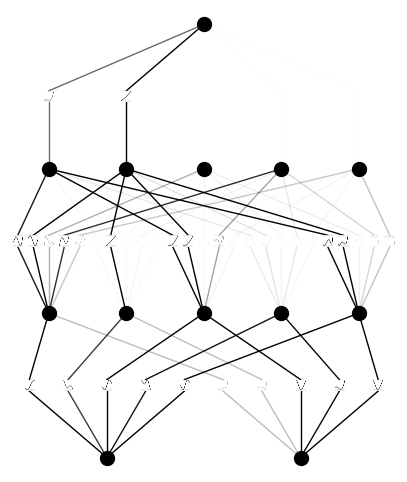

In [45]:
model(dataset['train_input'])
model.plot(beta=100)

In [46]:
model.train(dataset,opt="LBFGS",steps=20,lamb=0.01,lamb_entropy=10.)

train loss: 1.48e-01 | test loss: 1.59e-01 | reg: 5.44e+01 : 100%|██| 20/20 [00:09<00:00,  2.19it/s]


{'train_loss': [array(0.14832246, dtype=float32),
  array(0.14831685, dtype=float32),
  array(0.14830223, dtype=float32),
  array(0.14827724, dtype=float32),
  array(0.1482818, dtype=float32),
  array(0.14824294, dtype=float32),
  array(0.14820138, dtype=float32),
  array(0.14812729, dtype=float32),
  array(0.14810732, dtype=float32),
  array(0.14811343, dtype=float32),
  array(0.14810029, dtype=float32),
  array(0.14803551, dtype=float32),
  array(0.14790744, dtype=float32),
  array(0.1478581, dtype=float32),
  array(0.14784607, dtype=float32),
  array(0.14777508, dtype=float32),
  array(0.14772986, dtype=float32),
  array(0.14772299, dtype=float32),
  array(0.14764892, dtype=float32),
  array(0.14762652, dtype=float32)],
 'test_loss': [array(0.15983732, dtype=float32),
  array(0.15983264, dtype=float32),
  array(0.15982044, dtype=float32),
  array(0.15979922, dtype=float32),
  array(0.15980305, dtype=float32),
  array(0.1597705, dtype=float32),
  array(0.15973483, dtype=float32),
  a

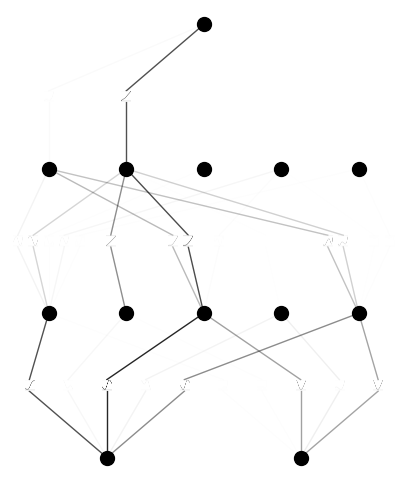

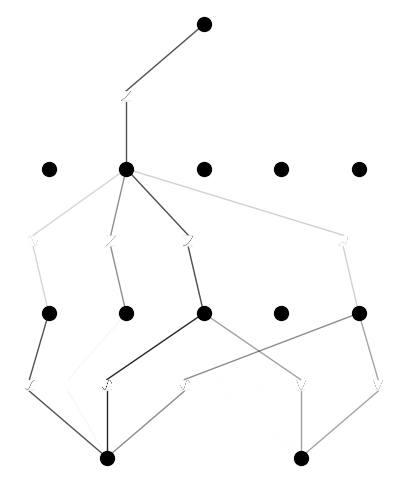

In [47]:
model.plot()
model.prune()
model.plot(mask=True)

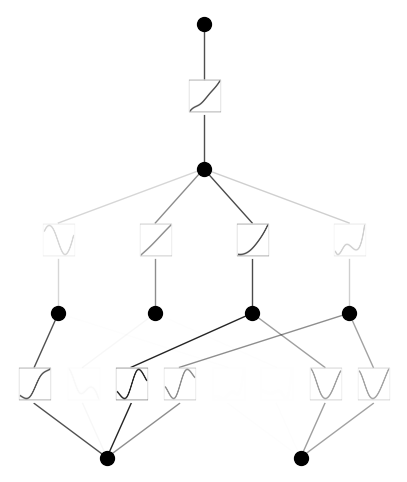

In [48]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [60]:
model.train(dataset,opt = "LBFGS",steps=20)

train loss: 1.30e-02 | test loss: 1.32e-02 | reg: 1.11e+01 : 100%|██| 20/20 [00:01<00:00, 17.86it/s]


{'train_loss': [array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32)],
 'test_loss': [array(0.01318421, dtype=float32),
  array(0.01318421, dtype=float32),
  array(0.01318421, dtype=float32),
  array(0.01318421, dtype=float32),
  array(0.01318421, dtype=float32),
  array(0.01318421, dtype=float32),
  array(0.01318421, dtype=float32),


In [100]:
# model.plot()
mode = "auto" # 
if mode == "manual":
    model.fix_symbolic(0,0,0,'sin')
    model.fix_symbolic(0,1,0,'x^2')
    model.fix_symbolic(1,0,0,'exp')
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)


skipping (0,0,0) since already symbolic
skipping (0,0,1) since already symbolic
skipping (0,0,2) since already symbolic
skipping (0,0,3) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,1,1) since already symbolic
skipping (0,1,2) since already symbolic
skipping (0,1,3) since already symbolic
skipping (1,0,0) since already symbolic
skipping (1,1,0) since already symbolic
skipping (1,2,0) since already symbolic
skipping (1,3,0) since already symbolic
skipping (2,0,0) since already symbolic


In [107]:
class LinearModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size,2*hidden_size)
        self.fc3 = nn.Linear(2*hidden_size, 4*hidden_size)
        self.fc4 = nn.Linear(4*hidden_size, output_size)


    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

linearModel = LinearModel(2, 5, 1)
print(linearModel)
optimizer = torch.optim.Adam(linearModel.parameters(), lr=0.01)
criterion = nn.MSELoss()

for epoch in range(1000):
    optimizer.zero_grad()
    y = linearModel(dataset["train_input"])
    loss = criterion(y, dataset["train_label"])
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Train_loss: {loss}")


LinearModel(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=1, bias=True)
)
Epoch 1, Train_loss: 5.83143949508667
Epoch 2, Train_loss: 5.427311897277832
Epoch 3, Train_loss: 5.016305923461914
Epoch 4, Train_loss: 4.599896430969238
Epoch 5, Train_loss: 4.179008960723877
Epoch 6, Train_loss: 3.7492563724517822
Epoch 7, Train_loss: 3.323174238204956
Epoch 8, Train_loss: 2.9160125255584717
Epoch 9, Train_loss: 2.532952308654785
Epoch 10, Train_loss: 2.196232795715332
Epoch 11, Train_loss: 1.9342716932296753
Epoch 12, Train_loss: 1.7752882242202759
Epoch 13, Train_loss: 1.7372864484786987
Epoch 14, Train_loss: 1.8062796592712402
Epoch 15, Train_loss: 1.9193824529647827
Epoch 16, Train_loss: 1.9949246644973755
Epoch 17, Train_loss: 1.9870368242263794
Epoch 18, Train_loss: 1.8998823165893555
Epoch 19, Train_loss: 1.76639

In [59]:
# model(dataset['train_input'])
model.train(dataset, opt="LBFGS", steps=20)

train loss: 1.30e-02 | test loss: 1.32e-02 | reg: 1.11e+01 : 100%|██| 20/20 [00:01<00:00, 17.48it/s]


{'train_loss': [array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32),
  array(0.01304621, dtype=float32)],
 'test_loss': [array(0.01318421, dtype=float32),
  array(0.01318421, dtype=float32),
  array(0.01318421, dtype=float32),
  array(0.01318421, dtype=float32),
  array(0.01318421, dtype=float32),
  array(0.01318421, dtype=float32),
  array(0.01318421, dtype=float32),


0.00017020351
0.027042884


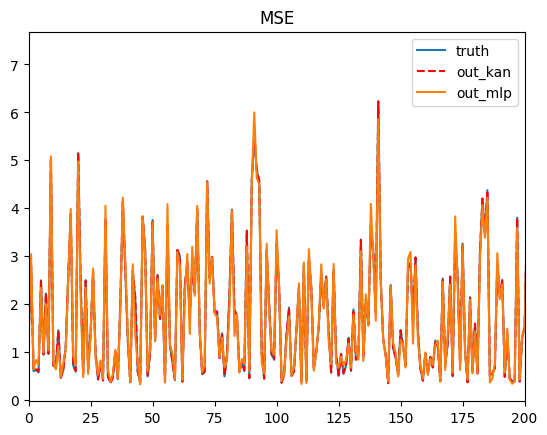

In [110]:
import gc
# del y
# gc.collect(0)
out_fit = model(dataset["train_input"])
out_mlp = linearModel(dataset["train_input"])
# print(y)
# print(dataset["train_label"])
# model.plot()
from sklearn.metrics import mean_squared_error

mse_kan = mean_squared_error(out_fit.detach().cpu().numpy(),dataset["train_label"])
mse_mlp = mean_squared_error(out_mlp.detach().cpu().numpy(),dataset["train_label"])
print(mse_kan)
print(mse_mlp)
plt.figure()
plt.plot(dataset["train_label"])
plt.plot(out_fit.detach().cpu().numpy(),c = 'r',linestyle = 'dashed')
plt.plot(out_mlp.detach().cpu().numpy())
plt.xlim(0,200)
plt.title("MSE")
plt.legend(['truth','out_kan','out_mlp'])